<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [5]:
df_numerico=df.select_dtypes(include=[np.number]).copy() ## se crea un dataframe solo de las variables numéricas
df_numerico.head()

array(['year', 'desplazamiento', 'cilindros', 'co2',
       'consumo_litros_milla'], dtype=object)

In [9]:
for columnas in df_numerico.columns.values: ## itero por cada columna
    promedio=df_numerico[columnas].mean()  ## saco el promedio de cada columna
    df_numerico.loc[df_numerico[columnas].isnull(),columnas]=promedio ##reemplazo los valores nan en cada columna por su promedio

In [21]:
###utilizo el método minmax
scaler = MinMaxScaler()
for columnas in df_numerico.columns: 
    df_numerico[[columnas]]= scaler.fit_transform(df_numerico[[columnas]])

df_numerico.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [23]:
df_cat=df.select_dtypes(exclude=[np.number]).copy() ##creo un dataframe solo con las variables categoricas
df_cat.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [30]:
df_cat_num=pd.get_dummies(df_cat) ##utilizo la funcion get_dummies para pasar variables categoricas a numéricas
df_pros=pd.concat([df_numerico,df_cat_num],axis=1, sort=False) ##concateno ambos dataframes
df_pros.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
a grandes razgos get_dummies separa por categoria y crea una nueva columna por cada una de estas, donde se tendra el valor 1
si el objeto cumple la categoria y 0 si no cumple con la categoria.
EJ: color de auto=[rojo, azul] , lo separa en
    columna rojo y columna azul 
    donde un auto rojo tendra valor 1 en la columna rojo y cero en columna azul. 

## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [35]:
### utilizo el metodo kmeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_pros)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [43]:
# etiquetar los datos con los clusters encontrados
df_pros["cluster"] = clusters
df_pros["cluster"] = df_pros["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]
df_pros.groupby('cluster').mean()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.427116,0.223807,0.173649,0.304609,0.226424,0.126488,0.097470,0.004836,0.088542,0.517113,...,0.000000,0.978051,0.000000,0.000000,0.021949,0.000000,0.992188,0.007812,0.000000,0.000000
1,0.478459,0.451028,0.327460,0.410095,0.343319,0.305117,0.017058,0.041365,0.048401,0.150533,...,0.958635,0.000000,0.040512,0.000853,0.000000,0.992324,0.000000,0.000640,0.007036,0.000000
2,0.587598,0.362209,0.299611,0.354123,0.282248,0.001512,0.083417,0.086442,0.190524,0.561240,...,0.000504,0.026210,0.973286,0.000000,0.000000,0.023690,0.000000,0.976310,0.000000,0.000000
3,0.741172,0.212542,0.158504,0.247526,0.163680,0.018823,0.196235,0.048458,0.344814,0.146576,...,0.000000,0.000400,0.000000,0.000000,0.999600,0.000000,0.023628,0.004806,0.000000,0.971566
4,0.412095,0.576135,0.420153,0.506906,0.449646,0.333801,0.003788,0.035639,0.038586,0.138628,...,0.040269,0.000000,0.009120,0.950610,0.000000,0.000982,0.000000,0.000140,0.998878,0.000000
5,0.575792,0.270653,0.210786,0.305378,0.226912,0.026272,0.094245,0.073394,0.192244,0.402419,...,0.000626,0.973728,0.000834,0.000000,0.024812,0.000000,0.968307,0.029817,0.000000,0.001877
6,0.409220,0.331717,0.256994,0.354336,0.282254,0.180425,0.083704,0.090789,0.132971,0.184380,...,0.000000,0.013841,0.981875,0.000165,0.004119,0.001153,0.000000,0.998847,0.000000,0.000000
7,0.486089,0.148482,0.139885,0.238061,0.153161,0.003027,0.077280,0.001816,0.035311,0.863801,...,0.000000,0.000000,0.000202,0.000000,0.999798,0.000000,0.002018,0.000404,0.000000,0.997579


In [46]:
df_pros.groupby('cluster').agg(lambda x:x.value_counts().index[0]) ### Por cada cluster encuentro la moda de cada columna

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.179487,0.142857,0.317749,0.241830,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0.029412,0.474359,0.285714,0.424351,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0.617647,0.307692,0.285714,0.374603,0.281734,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0.970588,0.230769,0.142857,0.275108,0.194444,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.000000,0.564103,0.428571,0.454199,0.393464,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0.970588,0.179487,0.142857,0.317749,0.241830,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,0.000000,0.307692,0.285714,0.374603,0.305011,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
7,0.029412,0.179487,0.142857,0.275108,0.194444,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [48]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_pros).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,127035.032949
1,10,84334.519279
2,20,66948.665624
3,30,57054.404970
4,50,45963.259328


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

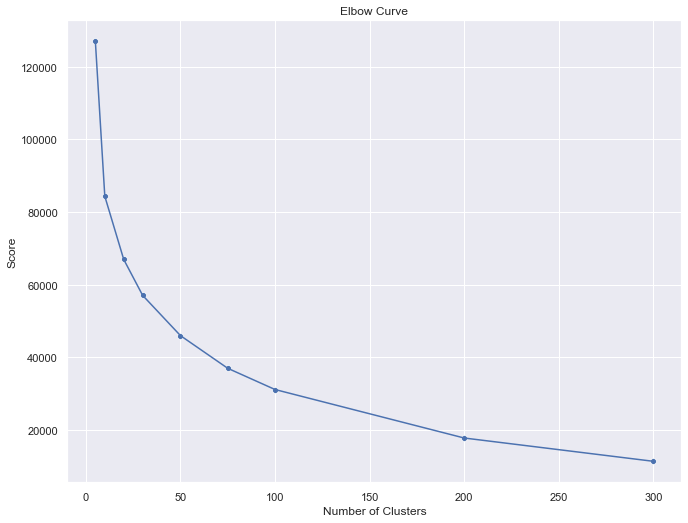

In [49]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

En este caso es dificil notar un cambio grande en los cluster, aún asi se puede apreciar que alrededor de 100 y 200 cluster el comportamiento de la curva cambia de manera significativa. Quizas seria bueno tomar más casos que esten entre los 100 y 300 cluster par aver su nuevo comportamineto.